<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

sns.set_context("poster")
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_style("whitegrid")

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [2]:
# Read CSV
house_csv = "Sacramento_transactions.csv"
data = pd.read_csv(house_csv)

In [3]:
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
data.shape

(985, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [6]:
data.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
zip,985.0,95750.697462,85.176072,95603.000000,95660.000000,95762.000000,95828.000000,95864.000000
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


In [8]:
data[data['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


In [9]:
data['type'].unique()

array(['Residential', 'Condo', 'Multi-Family', 'Unkown'], dtype=object)

In [10]:
data['type'].value_counts()

Residential     917
Condo            54
Multi-Family     13
Unkown            1
Name: type, dtype: int64

<AxesSubplot:>

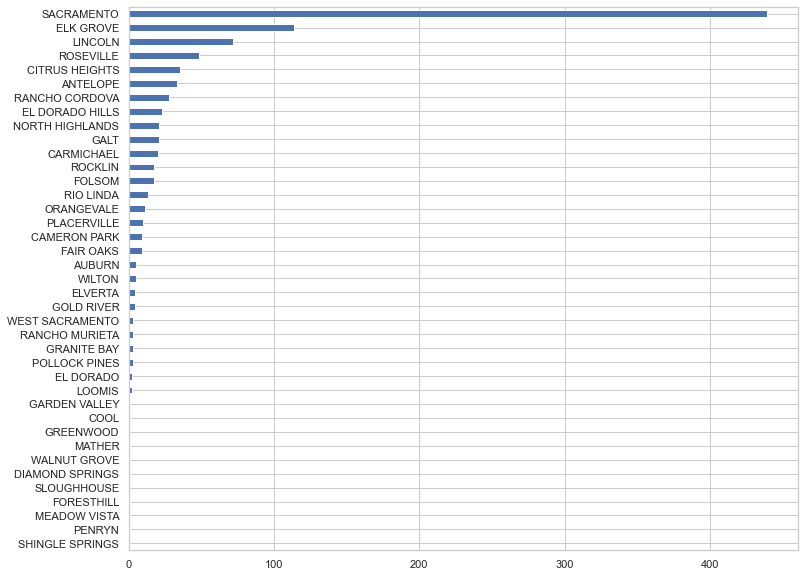

In [11]:
data['city'].value_counts().sort_values().plot(kind='barh', figsize=(12, 10))

In [12]:
data.loc[data['beds'] == 0, 'type'] = 'Plot'

<AxesSubplot:>

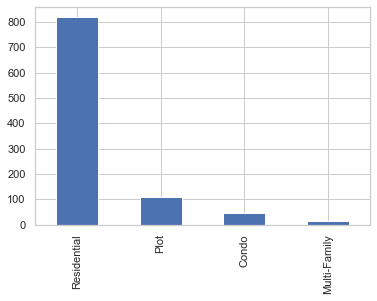

In [13]:
data['type'].value_counts().plot(kind='bar')

In [14]:
data['state'].value_counts()

CA    985
Name: state, dtype: int64

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [15]:
# ANSWER
#price


#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [16]:
# ANSWER
#beds
#sq__ft
#baths
#city
#type

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [17]:
# ANSWER
def draw_scatter(X, Y):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(10, 8))
    # get the axis of that figure
    ax = plt.gca()
    
    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='deeppink')
    
    plt.show()

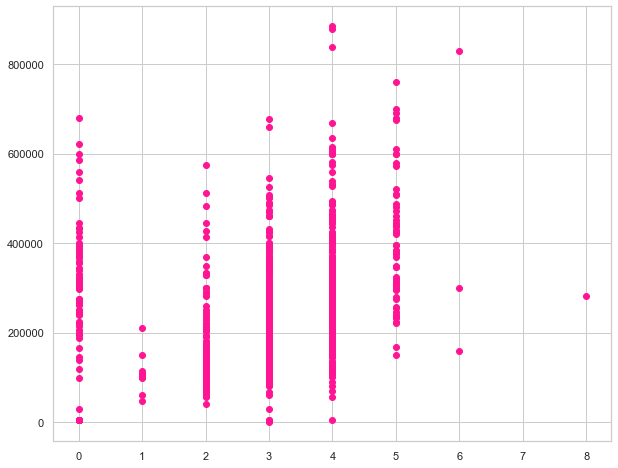

In [18]:
draw_scatter(data['beds'], data['price'])

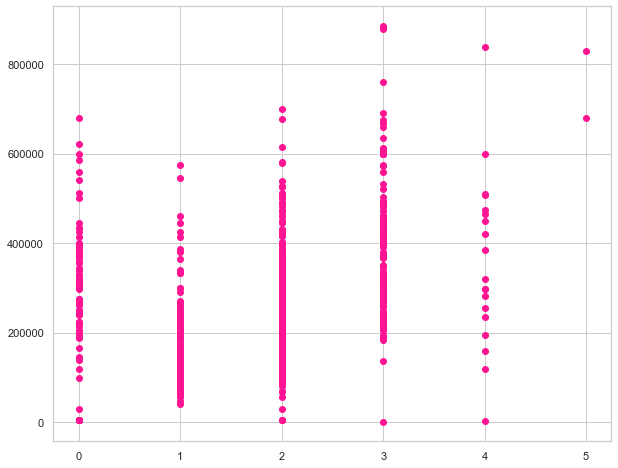

In [19]:
draw_scatter(data['baths'], data['price'])

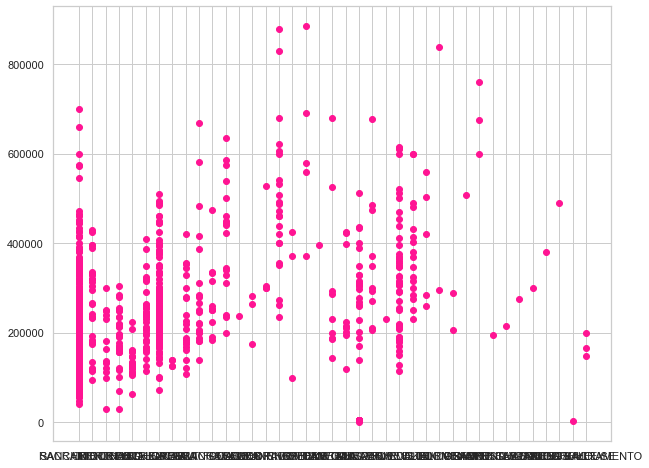

In [20]:
draw_scatter(data['city'], data['price'])

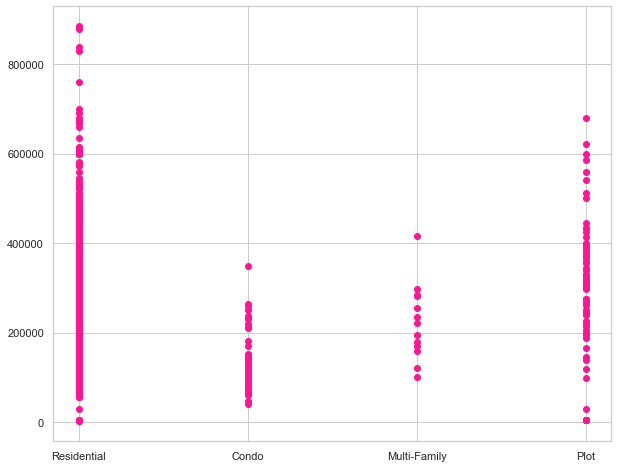

In [21]:
draw_scatter(data['type'], data['price'])

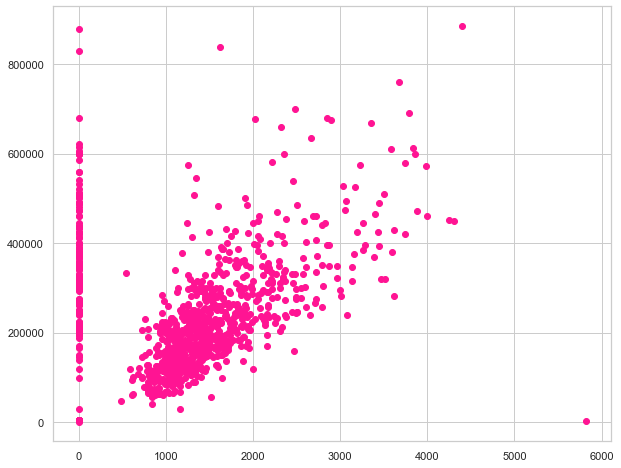

In [22]:
draw_scatter(data['sq__ft'], data['price'])

In [23]:
data.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


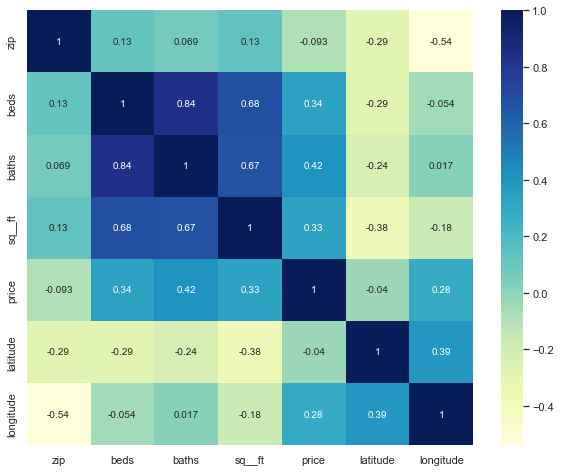

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [25]:
### sq_ft is the best predictor.
### sqft got stong relationship with beds, baths

#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [26]:
from sklearn.linear_model import LinearRegression

##### 2.4.1 Fit predictor and target variables using linear regression 

In [28]:
# ANSWER

X = data['sq__ft'].values.reshape(-1,1)
Y = data['price']

linreg = LinearRegression()
linreg.fit(X, Y)

print(linreg.coef_, linreg.intercept_)

[54.15863969] 162930.16140699777


##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [29]:
# ANSWER
linreg.score(X, Y)

0.11148717682951437

### 3. Splitting Data

In [30]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [32]:
# ANSWER
## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

#### 3.2 Check Shape, Sample of Test Train Data

In [55]:
# ANSWER
## Check training/test data
print('X_train is a %s' % type(X_train))
print('X_train has %d rows' % X_train.shape[0])
print(' ')
print('Sample of X_train%s' % (50 * '_'))
print(X_train[0:10])

print(' ')
print('y_train is a %s' % type(y_train))
print('y_train has %s rows' % y_train.shape)
print(' ')
print('Sample of y_train%s' % (50* '_'))
print(y_train[:10])

X_train is a <class 'numpy.ndarray'>
X_train has 788 rows
 
Sample of X_train__________________________________________________
[[ 682]
 [1247]
 [1424]
 [   0]
 [   0]
 [   0]
 [1100]
 [ 836]
 [ 846]
 [   0]]
 
y_train is a <class 'pandas.core.series.Series'>
y_train has 788 rows
 
Sample of y_train__________________________________________________
881    107666
313    445000
464    251000
302    380000
754    270000
602      4897
363    115000
362    115000
622    115000
310    433500
Name: price, dtype: int64


In [57]:
# ANSWER
## Check training/test data
print('X_test is a %s' % type(X_test))
print('X_test has %d rows' % X_test.shape[0])
print(' ')
print('Sample of X_test%s' % (50 * '_'))
print(X_test[0:10])

print(' ')
print('y_test is a %s' % type(y_test))
print('y_test has %s rows' % y_test.shape)
print(' ')
print('Sample of y_test%s' % (50* '_'))
print(y_test[:10])

X_test is a <class 'numpy.ndarray'>
X_test has 197 rows
 
Sample of X_test__________________________________________________
[[1457]
 [   0]
 [1189]
 [1284]
 [1758]
 [2462]
 [1462]
 [1082]
 [1430]
 [1370]]
 
y_test is a <class 'pandas.core.series.Series'>
y_test has 197 rows
 
Sample of y_test__________________________________________________
475    270000
824    390000
953    207000
106    280908
433    217500
152    539000
889    121500
680    190000
698    205878
393    155435
Name: price, dtype: int64


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [58]:
# ANSWER
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.coef_, linreg.intercept_)

[52.24473864] 163709.0004483726


In [59]:
# ANSWER
linreg.score(X_test, y_test)

0.1375859493111875

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [60]:
# ANSWER
linreg.intercept_, linreg.coef_

(163709.0004483726, array([52.24473864]))

In [62]:
beta0 = linreg.intercept_
beta1 = linreg.coef_
x = 1204

ypred = beta1 * x + beta0
print('Predicted house price is: ', ypred[0])

Predicted house price is:  226611.66577293785


In [69]:
x = [[1204]]
ypred = linreg.predict(x)
y_pred[:10]

array([239829.58464928, 163709.00044837, 225827.99469331, 230791.24486427,
       255555.25098042, 292335.54698415, 240090.80834249, 220237.80765865,
       238418.97670595, 235284.29238745])

#### Find the error

In [67]:
# Predict price from X_test
y_pred = linreg.predict(X_test)
print('Predicted house price is: ', y_pred[0])

Predicted house price is:  239829.58464927922


In [70]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred, squared=True)

16909570228.801842



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



